In [33]:
import pandas as pd
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import datetime
import os

## Датасет Kyoto

## Трансформация данных 

Задачи: 
1. Добавить хедеры 
2. Определить вид атаки на основе 4х используемых инструментов (IDS_detection, malware_detection, ashula_detection, label) с помощью "голосования"
4. Проредить строки без атак (выбрать каждую 10) 
7. Извлечи информацию о часе, когда проводилась атака 
8. Выявить атрибуты, которые имеют наибольшее влияие на целевой атрибут 

In [3]:
# файлы за 6 месяцев были перемещены в одну папку 2015_together
# в связи с ограничениями памяти будем использовать 20 файлов (20 дней) января 2015. 

In [40]:
name_list = ['duration',
 'service',
 'src_bytes',
 'dst_bytes',           
 'count',
 'same_srv_rate',
 'serror_rate',
 'srv_serror_rate',           
 'dst_host_count',
 'dst_host_srv_count',
 'dst_host_same_src_port_rate',
 'dst_host_serror_rate',
 'dst_host_srv_serror_rate',
 'flag',          
 'IDS_detection', 
 'malware_detection', 
 'ashula_detection', 
 'label', 
 'source_IP_address',
 'source_port_number', 
 'destination_IP_address', 
 'dstination_port_number', 
 'start_time',
 'protocol_type',
 'date'
] 

In [35]:
data = pd.DataFrame()

In [36]:
path = '2015_together/'

# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        df = pd.DataFrame()
        df = pd.read_csv(path + file ,delimiter='\t', header = None)
        df['date'] = datetime.date(int(file[:-8]), int(file[4:-6]), int(file[6:-4]))
        data = data.append(df, ignore_index = True)
        print(len(data))

381105
731701
1087930
1827825
2749962
3075122
3417735
3723600
3981141
4349384
4627712
4953763
5461251
5800592
6125351
6525662
6901510
7184022
7428282


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


7899029


In [41]:
data.columns=name_list

In [42]:
data.head()

,duration,service,src_bytes,dst_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,...,malware_detection,ashula_detection,label,source_IP_address,source_port_number,destination_IP_address,dstination_port_number,start_time,protocol_type,date
0,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0,0,-1,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,54992,fd95:ec1e:6a61:9478:7d39:2713:60a1:0514,23,00:00:00,tcp,2015-01-01
1,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0,0,-1,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,47904,fd95:ec1e:6a61:9c93:7df6:27d3:6096:040d,23,00:00:00,tcp,2015-01-01
2,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0,0,-1,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,58974,fd95:ec1e:6a61:6135:7d3a:2712:6027:0328,23,00:00:00,tcp,2015-01-01
3,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0,0,-1,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,37174,fd95:ec1e:6a61:b941:7d6b:27a6:6074:02ab,23,00:00:00,tcp,2015-01-01
4,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0,0,-1,fd95:ec1e:6a61:5cd4:2a7f:0315:78bc:7c66,40711,fd95:ec1e:6a61:a188:7d54:27f4:60c1:220d,3389,00:00:00,tcp,2015-01-01


Создадим дополнительную фитчу attack, которая базируется на значениях IDS_detection, malware_detection, ashula_detection, label. Сначала происходит голосование. Если больше 2 инструментов зафиксировали атаку, то значение атаки берется из IDS_detection. Значение атаки закадированно следующим образом:
* нет атаки : 0
* 6-128-1: 1
* 384-1-8: 2
* 1917-1-11: 3
* 19559-1-5: 4
* other: 5


In [43]:
k = []
n = 0
for i in range (len(data)): 
    n = 0
    if (data.label.iloc[i] == -1):
        n = n + 1    
    if (data.malware_detection.iloc[i] == '0'):
        n = n +1      
    if (data.ashula_detection.iloc[i] == '0'): 
        n = n + 1
    if (data.IDS_detection.iloc[i] == '0'): 
        n = n + 1
           
    if (n > 2): 
        k.append(0) # атаки нет
    elif ('6-128-1'in data.IDS_detection.iloc[i]):
        k.append(1)
    elif ('384-1-8'in data.IDS_detection.iloc[i]):
        k.append(2)
    elif ('1917-1-11'in data.IDS_detection.iloc[i]):
        k.append(3)
    elif ('19559-1-5'in data.IDS_detection.iloc[i]):
        k.append(4)
    else: 
        k.append(5)

In [44]:
len(k)

7899029

In [45]:
data['attack'] = k

In [46]:
data = data.drop(columns=['label', 'ashula_detection', 'malware_detection', 'IDS_detection'])

In [47]:
data.head()

,duration,service,src_bytes,dst_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,...,dst_host_srv_serror_rate,flag,source_IP_address,source_port_number,destination_IP_address,dstination_port_number,start_time,protocol_type,date,attack
0,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0.0,S0,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,54992,fd95:ec1e:6a61:9478:7d39:2713:60a1:0514,23,00:00:00,tcp,2015-01-01,0
1,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0.0,S0,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,47904,fd95:ec1e:6a61:9c93:7df6:27d3:6096:040d,23,00:00:00,tcp,2015-01-01,0
2,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0.0,S0,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,58974,fd95:ec1e:6a61:6135:7d3a:2712:6027:0328,23,00:00:00,tcp,2015-01-01,0
3,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0.0,S0,fd95:ec1e:6a61:f55c:1fa3:15ee:2e7a:0044,37174,fd95:ec1e:6a61:b941:7d6b:27a6:6074:02ab,23,00:00:00,tcp,2015-01-01,0
4,0.0,other,0,0,0,0.0,0.0,0.0,0,0,...,0.0,S0,fd95:ec1e:6a61:5cd4:2a7f:0315:78bc:7c66,40711,fd95:ec1e:6a61:a188:7d54:27f4:60c1:220d,3389,00:00:00,tcp,2015-01-01,0


In [48]:
data.attack.value_counts()

0    7859007
5      30553
1       6162
4       2928
3        237
2        142
Name: attack, dtype: int64

Данные содержат очень много значений attack == 0. Проредим данные. Выберем каждую 10ю строку,где attack == 0. 

In [49]:
data1 = data[(data.index % 10 == 0) & (data.attack == 0) | (data.attack != 0)]

In [50]:
data1.attack.value_counts()

0    785957
5     30553
1      6162
4      2928
3       237
2       142
Name: attack, dtype: int64

Добавим атрибуты связанные с датой: час в который проихошел запрос, день недели

In [51]:
pd.to_datetime(data1.start_time)

0         2020-08-16 00:00:00
10        2020-08-16 00:00:00
20        2020-08-16 00:00:01
30        2020-08-16 00:00:03
40        2020-08-16 00:00:06
                  ...        
7899024   2020-08-16 23:59:58
7899025   2020-08-16 23:59:58
7899026   2020-08-16 23:59:58
7899027   2020-08-16 23:59:58
7899028   2020-08-16 23:59:58
Name: start_time, Length: 825979, dtype: datetime64[ns]

In [52]:
data1['hour'] = pd.DatetimeIndex(pd.to_datetime(data1.start_time)).hour

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [53]:
data1 = data1.drop(columns=['start_time'])

In [56]:
# 0 - monday 
data1['weekday'] = pd.DatetimeIndex(pd.to_datetime(data1.date)).weekday

In [57]:
data1 = data1.drop(columns=['date'])

data1 - итоговый датасет, на котором будем тренировать и тестировать модель

##  Анализ данных 

Закодируем категоральные атрибуты 

In [58]:
data1.dtypes

duration                       float64
service                         object
src_bytes                        int64
dst_bytes                        int64
count                            int64
same_srv_rate                  float64
serror_rate                    float64
srv_serror_rate                float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_same_src_port_rate    float64
dst_host_serror_rate           float64
dst_host_srv_serror_rate       float64
flag                            object
source_IP_address               object
source_port_number               int64
destination_IP_address          object
dstination_port_number           int64
protocol_type                   object
attack                           int64
hour                             int64
weekday                          int64
dtype: object

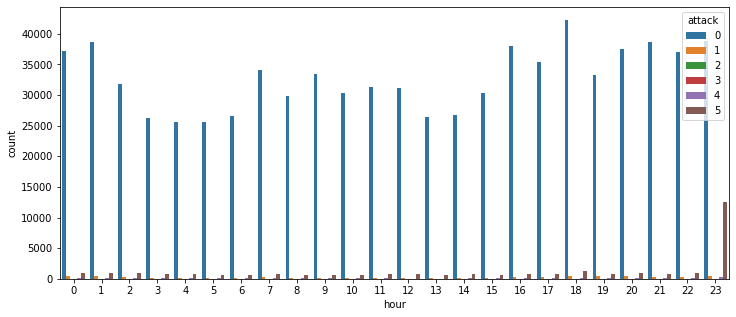

In [169]:
plt.figure(figsize=(12,5))

sns.countplot(x='hour', data = data1, hue='attack')

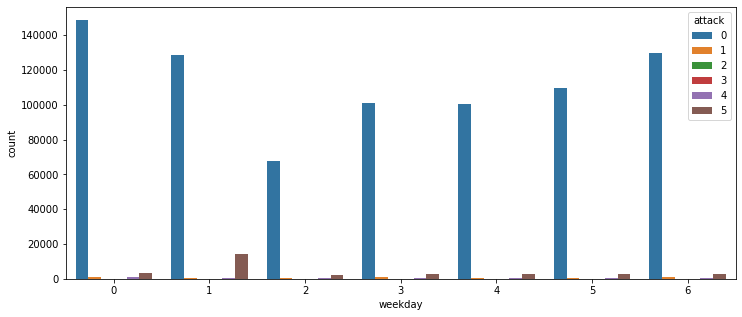

In [59]:
plt.figure(figsize=(12,5))

sns.countplot(x='weekday', data = data1, hue='attack')

В Январе резкий пик атак наблюдается в 11 вечера. Большое количество атак были совершены во вторник 

In [60]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

obj = ['protocol_type', 'service', 'flag', 'source_IP_address', 'destination_IP_address']
for column in obj:
    data1[column] = label_encoder.fit_transform(data1[column])
        
data1[obj].head()

,protocol_type,service,flag,source_IP_address,destination_IP_address
0,1,4,6,47332,2507
10,1,4,3,41956,2321
20,2,4,6,22061,3538
30,1,4,11,12014,2424
40,1,4,11,12014,2424


Нормализуем данные

In [61]:
from sklearn import preprocessing

x = data1.drop(columns=['attack']).values 

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data2 = pd.DataFrame(x_scaled)

In [62]:
n = data1['attack'].to_numpy()
data2['attack'] = n
n

array([0, 0, 0, ..., 5, 5, 1], dtype=int64)

In [63]:
data2['attack'] = data2.attack.astype('int64')

In [67]:
data2.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,attack
0,0.000000e+00,0.333333,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.500000,0.959186,0.839124,0.574078,0.000351,0.5,0.0,0.5,0
1,4.798011e-05,0.333333,1.625984e-07,0.000017,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.250000,0.850241,0.886915,0.531486,0.051714,0.5,0.0,0.5,0
2,8.500546e-04,0.333333,3.029784e-08,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.500000,0.447068,0.255772,0.810167,0.168923,1.0,0.0,0.5,0
3,8.436273e-10,0.333333,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.916667,0.243465,0.850721,0.555072,0.000336,0.5,0.0,0.5,0
4,4.934424e-10,0.333333,0.000000e+00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.916667,0.243465,0.156085,0.555072,0.000336,0.5,0.0,0.5,0


In [68]:
col = data1.columns
col

Index(['duration', 'service', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'flag',
       'source_IP_address', 'source_port_number', 'destination_IP_address',
       'dstination_port_number', 'protocol_type', 'attack', 'hour', 'weekday'],
      dtype='object')

In [70]:
data2.columns = ['duration', 'service', 'src_bytes', 'dst_bytes', 'count',
       'same_srv_rate', 'serror_rate', 'srv_serror_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_src_port_rate',
       'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'flag',
       'source_IP_address', 'source_port_number', 'destination_IP_address',
       'dstination_port_number', 'protocol_type', 'hour', 'weekday', 'attack']

In [71]:
data2.tail()

,duration,service,src_bytes,dst_bytes,count,same_srv_rate,serror_rate,srv_serror_rate,dst_host_count,dst_host_srv_count,...,dst_host_srv_serror_rate,flag,source_IP_address,source_port_number,destination_IP_address,dstination_port_number,protocol_type,hour,weekday,attack
825974,6.446586e-09,0.083333,2.322834e-08,5.005603e-08,0.12,1.0,0.0,0.00,0.98,0.98,...,0.0,0.833333,0.875248,0.685725,0.251431,0.000809,1.0,1.0,0.166667,5
825975,6.908193e-09,0.083333,2.322834e-08,5.005603e-08,0.13,1.0,0.0,0.00,0.98,0.98,...,0.0,0.833333,0.875248,0.551904,0.251431,0.000809,1.0,1.0,0.166667,5
825976,7.019616e-09,0.083333,1.767374e-08,3.315400e-08,0.14,1.0,0.0,0.00,0.98,0.98,...,0.0,0.833333,0.875248,0.223056,0.251431,0.000809,1.0,1.0,0.166667,5
825977,9.868848e-09,0.083333,1.767374e-08,3.315400e-08,0.15,1.0,0.0,0.00,0.98,0.98,...,0.0,0.833333,0.875248,0.824399,0.251431,0.000809,1.0,1.0,0.166667,5
825978,4.952984e-06,0.333333,0.000000e+00,3.185384e-08,0.01,1.0,0.0,0.86,0.24,0.00,...,0.0,0.583333,0.801625,0.636088,0.216396,0.000336,0.5,1.0,0.166667,1


Определим атрибуты с высокой корреляцией

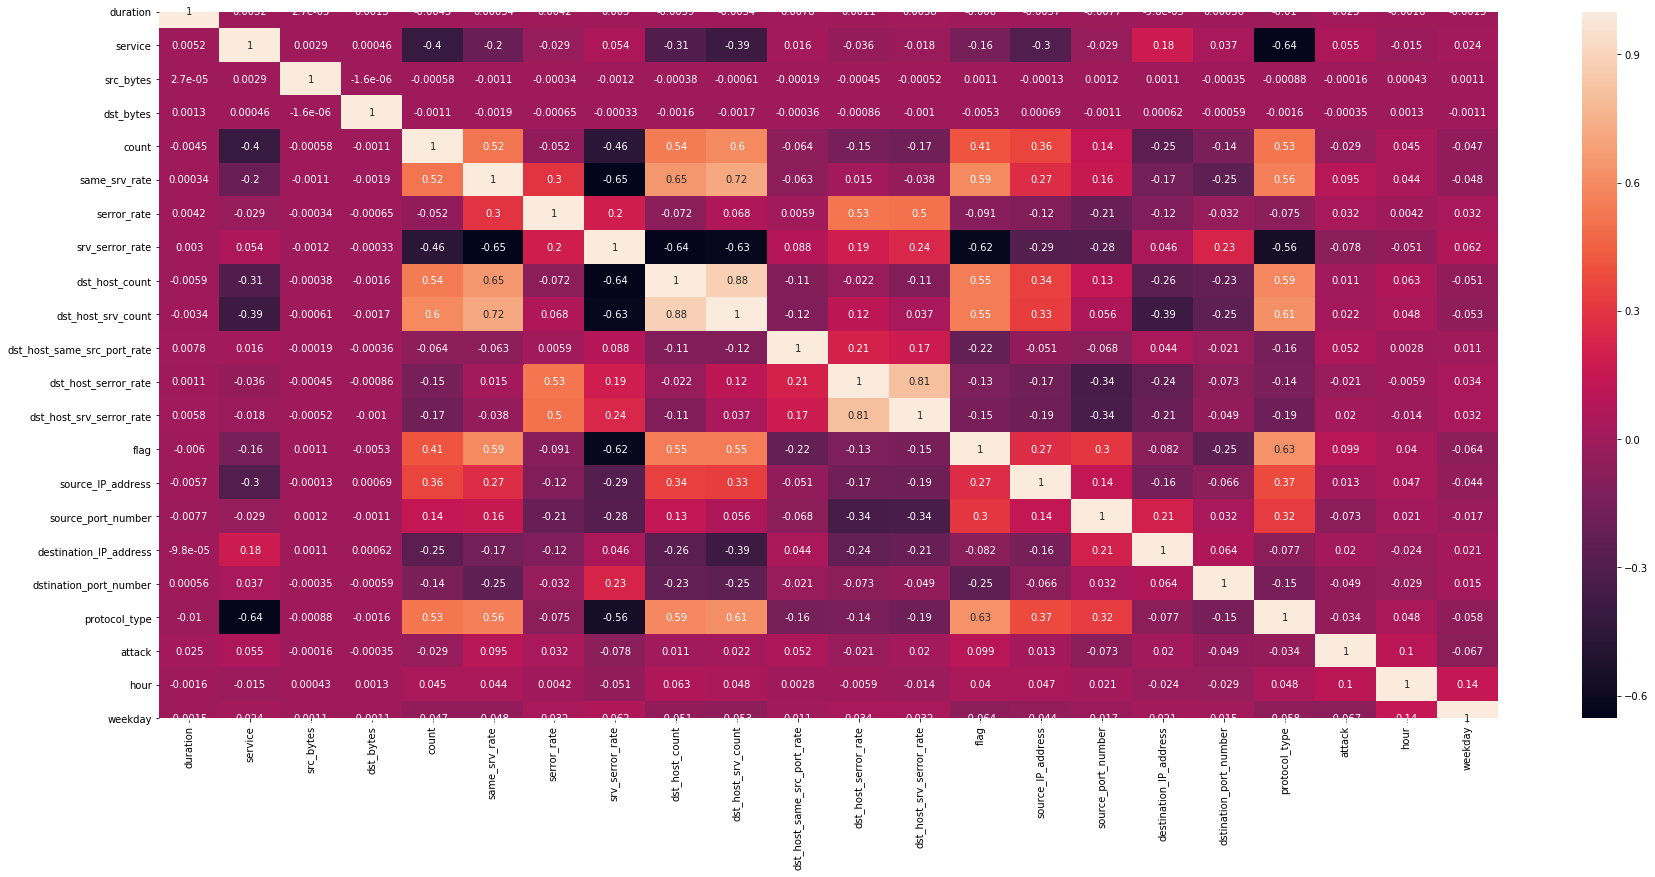

In [72]:
plt.figure(figsize=(30,13)) # размер графика
sns.heatmap(data = data1.corr(), annot=True)

In [73]:
data2 = data2.drop(columns=['dst_host_count', 'dst_host_serror_rate'])

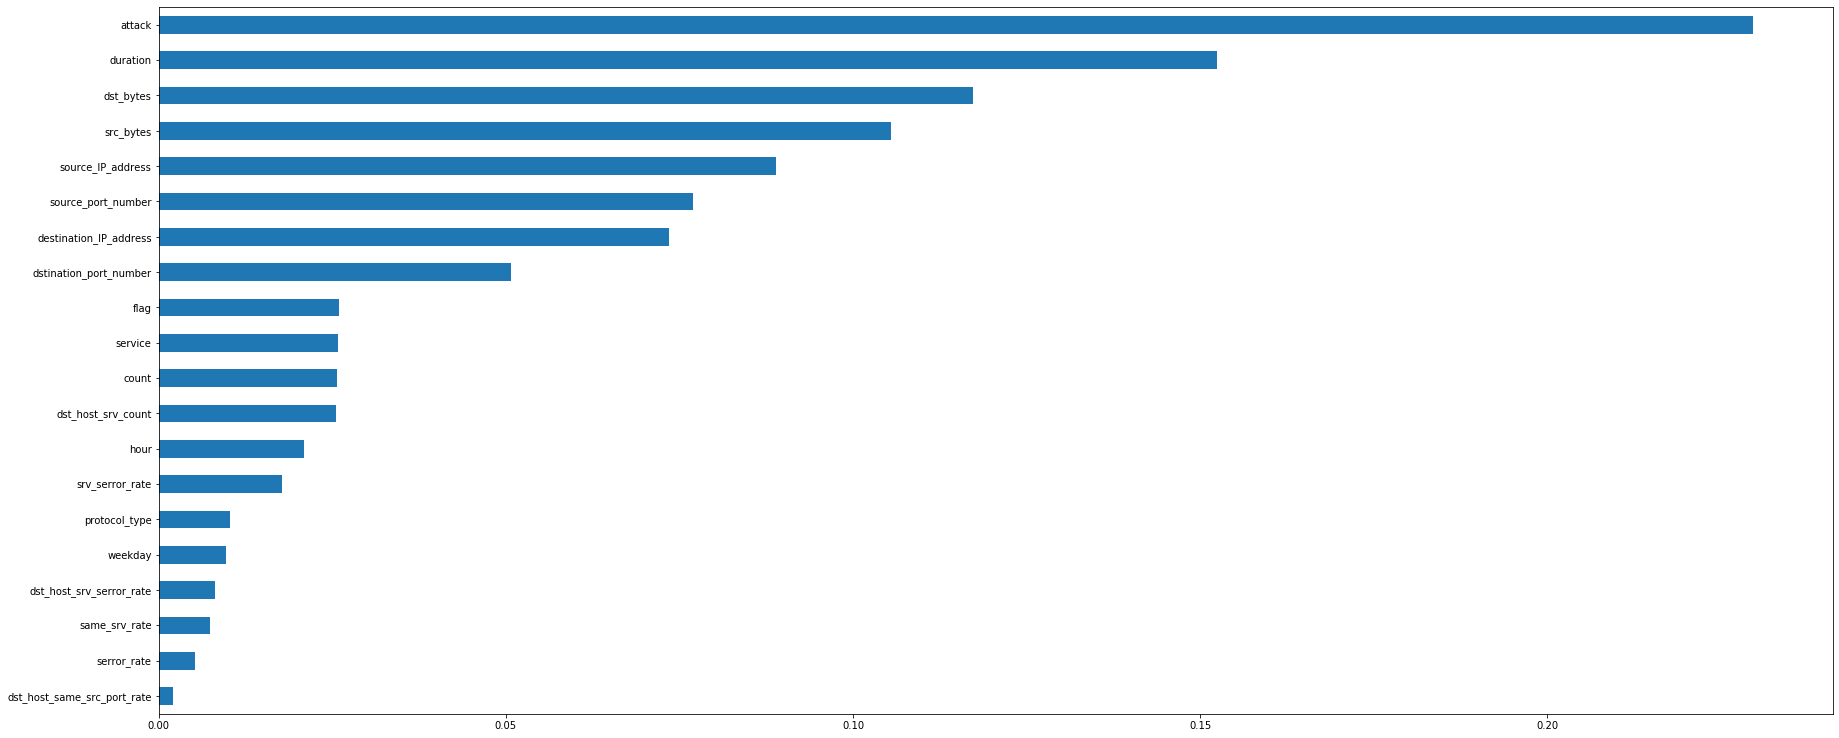

In [74]:
from sklearn.feature_selection import mutual_info_classif

plt.figure(figsize=(30,13))
imp_features = pd.Series(mutual_info_classif(data2, data2['attack'],
                                     discrete_features =True), index = data2.columns)
imp_features.sort_values(inplace = True)
imp_features.plot(kind = 'barh')

# Классификация

In [75]:
from sklearn.model_selection import train_test_split
y = data2['attack']
X = data2.drop(columns=['attack'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [76]:
X_train.shape

(660783, 19)

In [77]:
data2.to_csv('data2.csv')

In [96]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier

### Random forest classifier

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
clf = svm.SVC()
clf.fit(X_train, y_train)
clf.predict(X_test)

In [92]:
rfc = RandomForestClassifier(n_estimators=100, bootstrap = True, random_state=0)
rfc.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [93]:
y_pred = rfc.predict(X_test)

In [111]:
f1_rfc = f1_score(y_test, y_pred, average='micro')

In [112]:
f1_rfc

0.9791520375796025

### K-Nearest Neighbors

In [113]:
kn = KNeighborsClassifier(n_neighbors=3, weights = 'distance')
kn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

In [114]:
y_knn_pred = kn.predict(X_test)

In [115]:
f1_knn = f1_score(y_test, y_knn_pred, average='micro')

In [116]:
f1_knn

0.9677776701615051

### AdaBooster

In [120]:
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1)

In [117]:
f1_abc = f1_score(y_test, y_abc_pred, average='micro')

In [118]:
y_abc_pred = abc.predict(X_test)

In [119]:
f1_abc

0.8711772682147267

# Результат

Лучший результат показал случайный лес. С помощью статистического анализа мы можем дать рекомендации - система подвергается атакам чаще по всторникам в одиннадцатом часу вечера. На сонове этого исследования может быть построена модель для прогнозирования. 
